In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns
import plotly
import plotly.express as px

In [232]:
churn_data = pd.read_csv('/home/mike/Documents/Coding/Data/churn.csv')

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


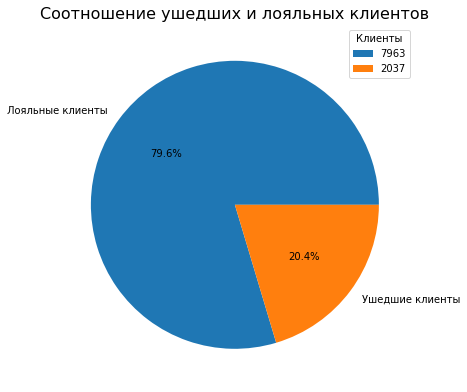

In [8]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

loyalty_rate = churn_data['Exited'].value_counts()

fig = plt.figure(figsize=(5, 5), facecolor='white')
axes = fig.add_axes([0, 0, 1, 1])

axes.pie(
    loyalty_rate,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%',
)
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
axes.legend(loyalty_rate,
            title='Клиенты',
            loc='upper right',
)

Число лояльных клиентов значительно превышает число ушедших клиентов.
Соотношение ушедших к лояльным клиентам составляет примерно 1 к 4

Text(0, 0.5, 'Число клиентов')

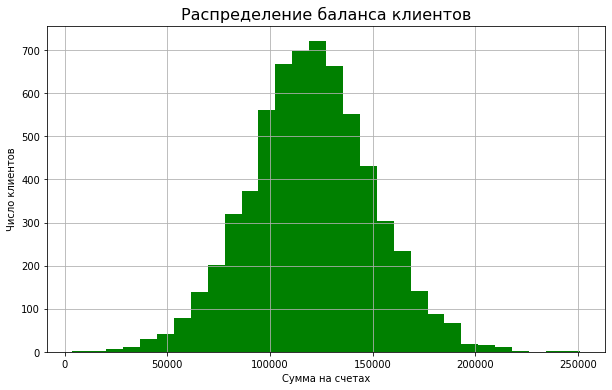

In [16]:
## 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

mask_2 = churn_data[churn_data['Balance'] > 2500]

histplot2 = mask_2['Balance'].plot(
    kind='hist',
    figsize=(10, 6),
    grid = True,
    color = 'green',
    bins=30
)

histplot2.set_title('Распределение баланса клиентов', fontsize=16)
histplot2.set_xlabel('Сумма на счетах')
histplot2.set_ylabel('Число клиентов')

In [ ]:
Наблюдается кривая стандартного распределения с пиком от 110,000 до 130,000. В целом, разброс объёма счетов от 0 (на графике - от 2500) до 250,000.

Text(0.5, 1.0, 'Распределение баланса клиента в разрезе признака оттока')

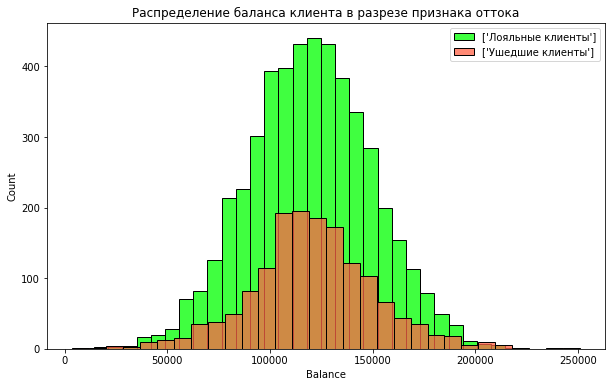

In [218]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 


churn_data_exited = churn_data[(churn_data['Balance'] > 2500) & (churn_data['Exited'] > 0)]
churn_data_loyal = churn_data[(churn_data['Balance'] > 2500) & (churn_data['Exited'] < 1)]

plt.figure(figsize=(10,6))
sns.histplot(x=churn_data_loyal["Balance"], label=['Лояльные клиенты'], color="lime", bins=30)
sns.histplot(x=churn_data_exited["Balance"], label=['Ушедшие клиенты'], color="tomato", bins=30)

plt.legend()
plt.title("Распределение баланса клиента в разрезе признака оттока")


В целом, распределение баланса ушедших и лояльных клиентов схожи, хотя пик у ушедших чуть сдвинут в меньшую сторону. В среде ушедших клиентов баланс на счёте преимущественно составляет 120000-140000. У лояльных клиентов вариативность баланса шире. В то же времея, можно заметить, что банк покинул ряд клиентов с объёмом средств около 250000. В среде лояльных клиентов остались те, у кого средств максимум - чуть более 200000. То есть банк в своё время упустил ряд самых состоятельных клиентов.

Text(0, 0.5, 'Тип пользователя')

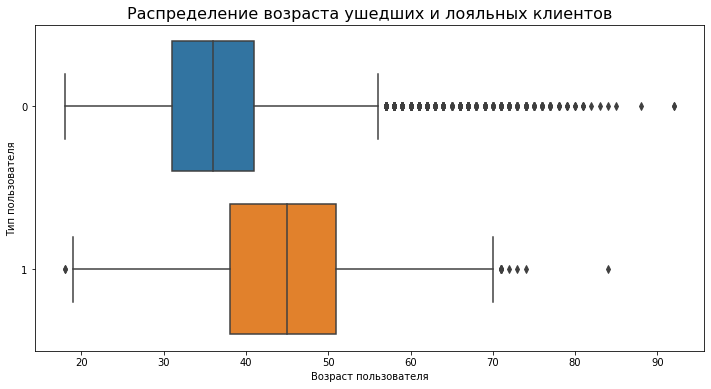

In [85]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=churn_data, x='Age', y='Exited', orient='h')
boxplot.set_title('Распределение возраста ушедших и лояльных клиентов', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')


Большинство ушедших клиентов - в возрасте 40-50 лет, тогда как лояльные клиенты - в среднем на 10 лет моложе.
В числе лояльных клиентов наблюдается относительно большое число потенциальных выбросов, что может говорить о неверно введённых данных и нуждается в дополнительном анализе.
Банку следует обратить внимание на пользователей 40-50 лет.

Text(0, 0.5, 'предполагаемая заработная плата')

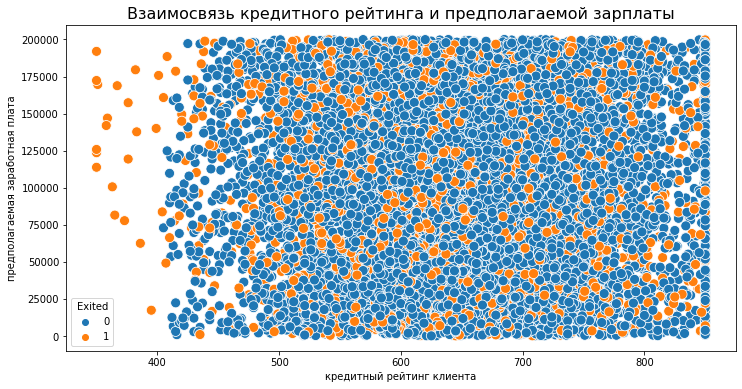

In [113]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

fig = plt.figure(figsize=(12, 6))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=100
)
scatterplot.set_title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('кредитный рейтинг клиента')
scatterplot.set_ylabel('предполагаемая заработная плата')

/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/mike/anaconda3/envs/sf/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

86.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



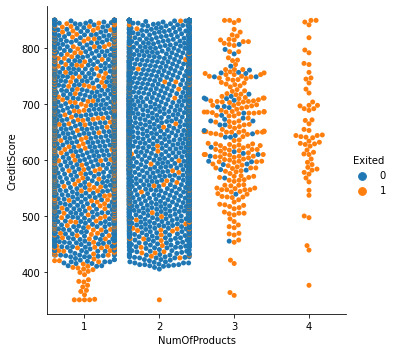

In [250]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

sns.catplot(x='NumOfProducts', y='CreditScore', hue='Exited', data = churn_data, kind='swarm')

In [ ]:
Я построил два графика. Создание второго занимает почти минуту - возможно, его можно построить иначе.
В любом случае, без логорифмических операций явной зависимости зарплаты и кредитного рейтинга не наблюдается.
Второй же график явно показывает, что подавляющее большинство пользователей, воспользовавшихся 3-4 услугами, покинули банк.
Также видно, что значительное число тех, кто воспользовался только одной услугой, также покинули банк.

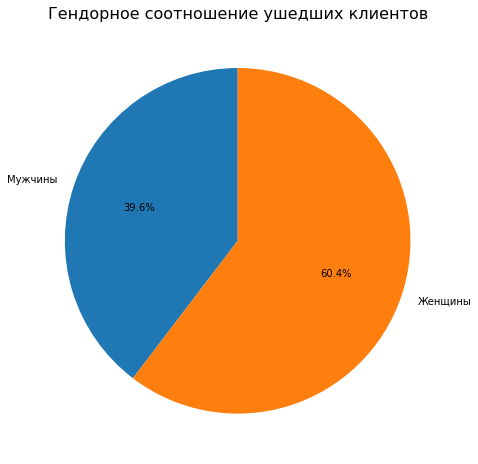

In [280]:
## 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

male_exited = round(churn_data[churn_data['Gender'] == 'Male']['Exited'].mean() * 100, 2)
female_exited = round(churn_data[churn_data['Gender'] == 'Female']['Exited'].mean() * 100, 2)
exited_ratio = pd.Series({
    'Мужчины': male_exited,
    'Женщины': female_exited},
    name = 'пол '
)

gender_agg = churn_data.groupby(by='Gender', as_index=False).mean()

fig = plt.figure(figsize=(12, 6), facecolor='white')
ax = fig.add_axes((1, 1, 1, 1))
pie = ax.pie(
    exited_ratio,
    labels=['Мужчины', 'Женщины'],
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Гендорное соотношение ушедших клиентов', fontsize=16)

plt.show(pie)



Женщины уходят практически на 50% чаще мужчин (если рассчёты верны).

** Наверняка, эту задачу можно решить намного проще. Хотелось бы узнать, как. 

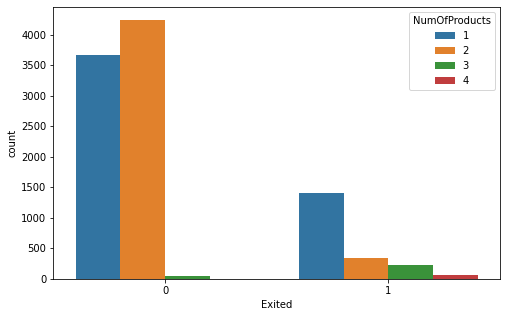

In [237]:
## 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='NumOfProducts', data=churn_data)

plt.show()

Большинстов лояльных клиентов воспользовались 1-2 услугами банка. Хотя среди ушедших клиентов также большиство воспользовались только одной услугой, обращает на себя внимание то, что значительное количество ушедших клиентов воспользовались также 3-4 услугами. Их число даже в абсолютных значениях превосходит число тех лояльных клиентов, кто воспользовался 3-4 услугами банка.
Уже из этого графика можно предположить, что чем больше клиенты используют услуги банка, тем выше вероятность, что банк потеряет их как клиентов.

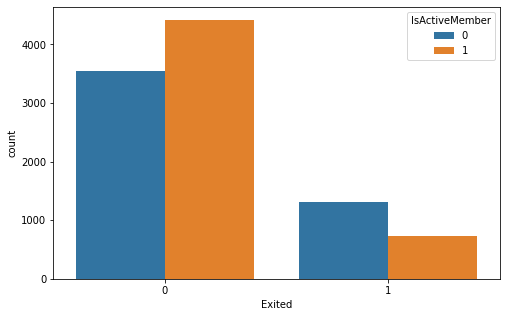

In [243]:
## 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
## Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_data)
plt.show()

На графике видно, что практически 2/3 ушедших клиентов не были активными пользователями. В то же время, большиство лояльных клиентов являются активными пользователями.
Банку следует активизировать свою аудиторию.

In [293]:
churn_data.groupby(by='Geography', as_index=False).mean()

,Geography,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,5025.228560,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
1,Germany,5000.278996,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
2,Spain,4950.667743,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [292]:
## 9.9. В какой стране доля ушедших клиентов больше?
## Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.


country_agg = churn_data.groupby(by='Geography', as_index=False).mean()

fig = px.choropleth(
    data_frame=country_agg,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    scope="europe",
    
    title='Доля ушедших клиентов по странам',
    width=700,
    height=500,
    color_continuous_scale='Reds'
)

fig.show()

Доля ушедших клиентов самая большая у Германии.
Из данного показателя сложно вывести причину данного положения.
В то же время, если рассмотреть весьмассив данных в разбивке по странам, то можно увидеть, что средний возраст пользователей из Германии чуть выше, чем из остальных стран (Франции и Испании). Кроме того, среднее число активных пользователей в Германии несколько меньше, чем из остальных стран.
Выше мы уже заметили корреляцию между этими признаками и степенью лояльности клиентов. Судя по всему, в дальнейшем анализе этих тенденций может крыться ответ на причины географической зависимости оттока клиентов.

In [303]:
# 9.10.
# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

CreditScoreCat_pvt = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
).round(2)

display(CreditScoreCat_pvt)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.28,0.21,0.14,0.17,0.13,0.23,0.24,0.13,0.20,0.27,0.25
Fair,0.22,0.22,0.21,0.22,0.20,0.21,0.24,0.17,0.21,0.19,0.21
Good,0.20,0.20,0.19,0.21,0.20,0.21,0.18,0.19,0.15,0.19,0.20
Poor,0.23,0.26,0.21,0.21,0.23,0.20,0.18,0.15,0.21,0.25,0.17
Very_Poor,0.44,0.25,0.15,0.29,0.29,0.15,0.23,0.21,0.25,0.23,0.33


In [328]:
# На основе полученной сводной таблицы постройте тепловую карту с аннотацией.
# Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

fig = px.imshow(CreditScoreCat_pvt,
    labels=dict(x="Tenure", y="CreditScoreCat", color="Exited"),
    x=CreditScoreCat_pvt.columns.tolist(),
    y=CreditScoreCat_pvt.index.tolist(),
    title='Отток клиентов в зависимости от кредитного рейтинга и продолжительности пользования банком'
)

fig.show()

Судя по всему (если данная визуализация верна), системная корреляция между оттоком клиентов в зависимости от кредитного рейтинга и продолжительности пользования банком просматривается плохо.
В глаза бросаются очевидные экстремы по максимальному оттоку среди клиентов с минимальным кредитным рейтингом - те, кто был с банком менее года, а также те, кто был с банком 10 лет. В целом, самый низкий кредитный рейтинг ведёт к довольно значительному оттоку, хотя есть и ряд исключений.